In [1]:
from pathlib import Path
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from datetime import datetime
import os
import sys
import csv
import re
import stanza
import pandas as pd
import numpy as np
import plotly

# Basic paths
src_path = str(Path.cwd().parent / "pdfs")
sys.path.append(src_path)
src_path = str(Path.cwd().parent / "src")
sys.path.append(src_path)

project_path = Path().resolve().parent
csv_path = project_path / "speeches_csv"
sa_path = project_path / "sentiment_analysis" #changed name

# Taking 1 speech per topic

In [40]:
df = pd.read_csv(sa_path / "topic_sa.csv")
df[df['main_topic_1'] == 'Topic 4']

# 'Prayer_Breakfast_2016' 0 
# 'Elena_Kagan_USSC_Nomination' 44
# 'NW_Flight_253_Update' 17
# 'Umpqua_Community_College_Shootings' 3 
# 'White_House_Correspondent_Dinner_2013' 4
# 'Senate_Floor_Immigration_Reform' 6
# 'Border_Security_and_Immigration_Reform' 5
# 'Security_Team_Announcement' 1
# 'UN_Copenhagen_Climate_Change' 8 
# 'India_Speech_at_New_Delhi' 10


,title,date_x,stanza,textblob,vader,subjectivity,pages,date_y,location,highest_speaker_count,...,main_topic_6,main_topic_6_perc,main_topic_7,main_topic_7_perc,main_topic_8,main_topic_8_perc,main_topic_9,main_topic_9_perc,main_topic_10,main_topic_10_perc
3,Umpqua_Community_College_Shootings,2015-10-01,-0.250,0.061,-0.998,0.435,4,2015-10-01,Washington D.C.,0,...,Topic 1,0.027939,Topic 5,0.027939,Topic 6,0.027939,Topic 10,0.027938,Topic 9,0.027937
15,Aurora_Tragedy,2012-07-20,0.022,0.131,0.998,0.481,3,2012-07-20,"Harborside Event Center, Fort Myers, Florida",0,...,Topic 2,0.055878,Topic 3,0.055877,Topic 10,0.055876,Topic 7,0.055875,Topic 9,0.055873
23,Gun_Violence_Exec_Order_23,2013-01-16,-0.233,0.139,-0.992,0.505,6,2013-01-16,unknown_location,0,...,Topic 5,0.013444,Topic 7,0.013444,Topic 2,0.013444,Topic 6,0.013444,Topic 10,0.013444
28,Senate_Vote_Background_Check,2013-04-17,-0.270,0.060,-0.998,0.393,4,2013-04-17,"White House, Washington D.C.",0,...,Topic 9,0.020165,Topic 3,0.020165,Topic 5,0.020165,Topic 10,0.020164,Topic 6,0.020164
38,Sandy_Hook_Elementary_School,2012-12-14,-0.182,0.179,0.997,0.502,2,2012-12-14,unknown_location,0,...,Topic 3,0.076346,Topic 2,0.076346,Topic 10,0.076345,Topic 7,0.076344,Topic 9,0.076342
39,Newtown_Vigil_Address,NaN,NaN,NaN,NaN,NaN,5,2012-12-16,"Newtown, Connecticut",1,...,Topic 6,0.025451,Topic 10,0.025450,Topic 2,0.025450,Topic 3,0.025449,Topic 9,0.025449
63,Navy_Yard_Shooting_Memorial,2013-09-22,-0.119,0.128,0.999,0.510,5,2013-09-22,"The Marine Barracks, Washington D.C.",0,...,Topic 3,0.016398,Topic 2,0.016397,Topic 10,0.016397,Topic 6,0.016397,Topic 9,0.016397
104,Gun_Violence_Reduction_Steps,NaN,NaN,NaN,NaN,NaN,8,2015-01-05,"White House, Washington D.C.",3,...,Topic 8,0.008638,Topic 2,0.008638,Topic 10,0.008637,Topic 9,0.008637,Topic 3,0.008637
142,Gun_Violence_Denver,2013-04-03,-0.203,0.128,-0.998,0.493,7,2013-04-03,"Denver Police Academy, Denver. Colorado",0,...,Topic 7,0.011418,Topic 6,0.011417,Topic 3,0.011417,Topic 10,0.011417,Topic 9,0.011417
180,Orlando_Shootings_Statement,2016-06-12,-0.060,0.050,0.312,0.570,3,2016-06-12,"White House, Washington D.C.",0,...,Topic 5,0.048790,Topic 6,0.048789,Topic 10,0.048788,Topic 9,0.048788,Topic 7,0.048787


In [7]:
sa_topic = df.groupby('main_topic_1').mean()
sa_topic = sa_topic.reindex(['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8', 'Topic 9', 'Topic 10']) 
sa_topic

,stanza,textblob,vader,subjectivity,pages,highest_speaker_count,count_commas,main_topic_1_perc,main_topic_2_perc,main_topic_3_perc,main_topic_4_perc,main_topic_5_perc,main_topic_6_perc,main_topic_7_perc,main_topic_8_perc,main_topic_9_perc,main_topic_10_perc
main_topic_1,,,,,,,,,,,,,,,,,
Topic 1,-0.079457,0.140609,0.768565,0.476957,7.019608,0.137255,0.901961,50.524537,28.458202,11.884472,6.613988,1.803442,0.526793,0.109548,0.040335,0.019342,0.019341
Topic 2,-0.089000,0.163900,0.911100,0.495500,5.090909,0.090909,0.636364,67.479383,23.035060,6.366554,2.924849,0.032361,0.032360,0.032359,0.032359,0.032358,0.032357
Topic 3,-0.123692,0.118192,0.429962,0.425923,4.344828,0.172414,0.724138,66.974072,21.800014,6.952530,3.195858,0.944571,0.026592,0.026592,0.026591,0.026590,0.026590
Topic 4,-0.147250,0.112750,0.112000,0.482583,5.071429,0.285714,0.785714,68.909521,17.570980,8.397654,4.696651,0.280858,0.028868,0.028868,0.028867,0.028867,0.028866
Topic 5,-0.089389,0.152944,0.992097,0.465528,6.776596,0.351064,0.851064,62.771451,24.090191,8.018768,3.309108,1.113337,0.338063,0.170717,0.115196,0.053639,0.019530
Topic 6,-0.066810,0.157143,0.998905,0.453667,5.269231,0.384615,0.846154,64.089971,22.051291,8.751268,3.186285,1.294493,0.416308,0.089134,0.067179,0.027036,0.027035
Topic 7,-0.216680,0.133880,0.995240,0.455800,6.793103,0.172414,0.586207,72.369624,21.497405,4.723370,0.847818,0.310230,0.191003,0.015138,0.015138,0.015137,0.015137
Topic 8,-0.013620,0.149060,0.937320,0.473900,5.218182,0.127273,0.927273,73.817778,16.727022,6.078433,2.058617,0.794881,0.385445,0.071003,0.022274,0.022274,0.022273
Topic 9,-0.149154,0.128385,0.999538,0.449154,6.684211,0.315789,0.736842,71.252549,16.295338,7.477971,3.588961,0.930725,0.241170,0.114898,0.071236,0.013576,0.013575


In [45]:
samples = df.loc[[0, 44, 17, 3, 4, 6, 5, 1, 8, 10], ]
samples = samples[['title', 'date_x', 'stanza', 'textblob', 'vader', 'subjectivity', 'location', 'main_topic_1']]
samples

,title,date_x,stanza,textblob,vader,subjectivity,location,main_topic_1
0,Prayer_Breakfast_2016,2016-02-04,0.099,0.178,1.000,0.542,"Washington Hilton, Washington D.C.",Topic 1
44,Elena_Kagan_USSC_Nomination,2010-05-10,0.277,0.268,1.000,0.499,unknown_location,Topic 2
17,NW_Flight_253_Update,2009-12-29,-0.054,0.109,0.995,0.461,"Kaneohe Bay Marine Base, Kaneohe, Hawaii",Topic 3
3,Umpqua_Community_College_Shootings,2015-10-01,-0.250,0.061,-0.998,0.435,Washington D.C.,Topic 4
4,White_House_Correspondent_Dinner_2013,2013-04-27,-0.012,0.145,1.000,0.501,"Washington Hilton Hotel, Washington D.C.",Topic 5
6,Senate_Floor_Immigration_Reform,2007-05-23,-0.118,0.086,0.998,0.466,Washington D.C.,Topic 6
5,Border_Security_and_Immigration_Reform,2014-06-30,-0.177,0.145,0.999,0.436,unknown_location,Topic 7
1,Security_Team_Announcement,2008-12-01,0.140,0.162,0.998,0.403,"Chicago, Illinois",Topic 8
8,UN_Copenhagen_Climate_Change,2009-12-18,-0.090,0.140,1.000,0.411,"Copenhagen, Denmark",Topic 9
10,India_Speech_at_New_Delhi,2015-01-27,0.086,0.208,1.000,0.487,"Siri Fort Auditorium, New Delhi, India",Topic 10


# Per Sentence SA

In [47]:
df2 = pd.read_csv(csv_path / "all_speeches_cleaned.txt")
OneSpeaker = df2[ df2["highest_speaker_count"] <= 3 ]
OneSpeaker.reset_index(drop=True, inplace=True)
OneSpeaker

,title,pages,date,location,highest_speaker_count,content,country,count_commas,state,city,specific_location
0,Prayer_Breakfast_2016,7,2016-02-04,"Washington Hilton, Washington D.C.",0,"Well, good morning. Giving all praise and hono...",USA,1,no_state,Washington D.C.,Washington Hilton
1,Security_Team_Announcement,5,2008-12-01,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...",USA,1,Illinois,Chicago,no_specific_location
2,Cairo_University,14,2009-06-04,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...,Egypt,1,no_state,Cairo,no_specific_location
3,Umpqua_Community_College_Shootings,4,2015-10-01,Washington D.C.,0,There's been another mass shooting in America ...,USA,0,no_state,Washington D.C.,no_specific_location
4,White_House_Correspondent_Dinner_2013,6,2013-04-27,"Washington Hilton Hotel, Washington D.C.",0,"Thank you. Thank you, everybody. How do you li...",USA,1,no_state,Washington D.C.,Washington Hilton Hotel
...,...,...,...,...,...,...,...,...,...,...,...
341,Shimon_Peres_Memorial,6,2016-09-30,"Mount Herzl, Jerusalem, Israel",0,"Zvia, Yoni, Chemi and generations of the Peres...",Israel,2,no_state,Jerusalem,Mount Herzl
342,ASEAN_Business_2015,9,2015-11-21,"Shangri-La Hotel, Kuala Lumpur, Malaysia",0,"Thank you so much. Please be seated. Well, goo...",Malaysia,2,no_state,Kuala Lumpur,Shangri-La Hotel
343,Finance_Crisis_Fee,3,2010-01-14,unknown_location,0,"Thank you, everybody, for being here. As we al...",USA,0,no_state,Washington D.C.,White House
344,Oval_Office_Counter_Terrorism_Agenda,5,2015-12-06,"White House, Washington D.C.",0,"Good evening. On Wednesday, 14 Americans were ...",USA,1,no_state,Washington D.C.,White House


In [48]:
Titles = ['Prayer_Breakfast_2016', 'Elena_Kagan_USSC_Nomination', 'NW_Flight_253_Update', 'Umpqua_Community_College_Shootings',
          'White_House_Correspondent_Dinner_2013', 'Senate_Floor_Immigration_Reform', 'Border_Security_and_Immigration_Reform', 
          'Security_Team_Announcement' , 'UN_Copenhagen_Climate_Change' , 'India_Speech_at_New_Delhi']

In [61]:
OneSpeaker = OneSpeaker[OneSpeaker.title.isin(Titles)] 
OneSpeaker

,title,pages,date,location,highest_speaker_count,content,country,count_commas,state,city,specific_location
0,Prayer_Breakfast_2016,7,2016-02-04,"Washington Hilton, Washington D.C.",0,"Well, good morning. Giving all praise and hono...",USA,1,no_state,Washington D.C.,Washington Hilton
1,Security_Team_Announcement,5,2008-12-01,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...",USA,1,Illinois,Chicago,no_specific_location
3,Umpqua_Community_College_Shootings,4,2015-10-01,Washington D.C.,0,There's been another mass shooting in America ...,USA,0,no_state,Washington D.C.,no_specific_location
4,White_House_Correspondent_Dinner_2013,6,2013-04-27,"Washington Hilton Hotel, Washington D.C.",0,"Thank you. Thank you, everybody. How do you li...",USA,1,no_state,Washington D.C.,Washington Hilton Hotel
5,Border_Security_and_Immigration_Reform,5,2014-06-30,unknown_location,0,"Good afternoon, everybody. One year ago this m...",USA,0,no_state,Washington D.C.,White House
6,Senate_Floor_Immigration_Reform,5,2007-05-23,Washington D.C.,0,"Mr. President, Last year I spoke1 at one of th...",USA,0,no_state,Washington D.C.,no_specific_location
8,UN_Copenhagen_Climate_Change,3,2009-12-18,"Copenhagen, Denmark",0,Good morning. It is an honor for me to join th...,Denmark,1,no_state,Copenhagen,no_specific_location
10,India_Speech_at_New_Delhi,9,2015-01-27,"Siri Fort Auditorium, New Delhi, India",0,"Thank you so much. Thank you so much, Neha, fo...",India,2,no_state,New Delhi,Siri Fort Auditorium
17,NW_Flight_253_Update,3,2009-12-29,"Kaneohe Bay Marine Base, Kaneohe, Hawaii",0,Good morning. Yesterday I updated the American...,USA,2,Hawaii,Kaneohe,Kaneohe Bay Marine Base
44,Elena_Kagan_USSC_Nomination,3,2010-05-10,unknown_location,0,"Thank you very much. Everybody, please have a ...",USA,0,no_state,Washington D.C.,White House


In [62]:
# Test how to apply a function in a pandas dataframe and not break stuff (check cell 2 for context)
def clean_txt(string):
    string = string.replace(" -- ", ", ")
    return string

## This is to replace the content column in pandas
## Pandas is stupid and has issues with naming things with the same variable name
a = OneSpeaker["content"].map(lambda x: clean_txt(x))
a = a.to_list()
OneSpeaker = OneSpeaker.assign(content = a)

In [63]:
# Apply the sentiment model function to all content and get a score dataframe

cont_save = OneSpeaker["content"].to_list()
stop = len(cont_save)       # Change this to use all dataset

In [197]:
# tb = [ textblob_fn(cont_save[i], i, stop-1) for i in range(stop) ]
Speeches = []
for i in range(stop):
    tb_speech = TextBlob(cont_save[i])
    Speeches.append(tb_speech)
Speeches[0]


TextBlob("Well, good morning. Giving all praise and honor to God for bringing us together here this morning. I want to thank everyone who helped organize this breakfast, especially our co-chairs, Robert and Juan, who embody the tradition of friendship, fellowship, and prayer. I will begin with a confession: I have always felt a tinge of guilt motorcading up here at the heart of D.C.'s rush hour. I suspect that not all the commuters were blessing me as they waited to get to work. But it's for a good cause. A National Prayer Brunch doesn't have the same ring to it. And Michelle and I are extremely honored, as always, to be with so many friends, with members of Congress, with faith leaders from across the country and around the world, to be with the Speaker, Leader. I want thank Mark and Roma for their friendship and their extraordinary story, and sharing those inspiring words. Andre, for sharing his remarkable gifts. And on this occasion, I always enjoy reflecting on a piece of scripture

In [206]:
Polarity=[]
for speech in Speeches:
    tb_sa = []
    for sentence in speech.sentences:
        pol= sentence.sentiment.polarity
        tb_sa.append(pol)
    Polarity.append(tb_sa)
# print(Polarity)

PolarityPerSent = pd.DataFrame(Polarity)
PolarityPerSent = PolarityPerSent.transpose()
PolarityPerSent

,0,1,2,3,4,5,6,7,8,9
0,0.7,0.700000,0.000000,0.000000,0.7,0.0,0.7,0.2,0.70,0.260000
1,0.0,1.000000,0.250000,0.000000,0.0,0.0,0.0,0.6,0.25,0.000000
2,0.0,0.133333,-0.166667,0.136364,0.0,0.0,0.0,0.0,-0.25,0.700000
3,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.2,0.5,0.00,0.193333
4,0.0,0.200000,0.700000,-0.187500,0.0,0.5,0.0,1.0,0.00,0.100000
...,...,...,...,...,...,...,...,...,...,...
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


<AxesSubplot:>

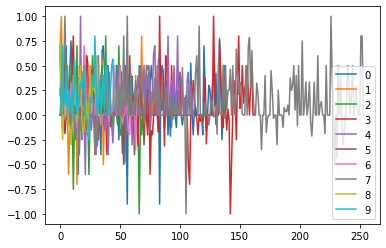

In [211]:
PolarityPerSent.plot()

In [221]:
PolarityPerSent.var(skipna=True, numeric_only=None, ddof=0)
# ddof=0 can be set to normalize by N instead of N-1

0    0.079567
1    0.067432
2    0.078035
3    0.076991
4    0.068879
5    0.040649
6    0.038678
7    0.068651
8    0.060722
9    0.049127
dtype: float64

When I do with N-1

PolarityPerSent.var(skipna=True, numeric_only=None)
0    0.080148
1    0.068235
2    0.079134
3    0.077467
4    0.069500
5    0.041206
6    0.039273
7    0.068921
8    0.062457
9    0.050218
dtype: float64

N-1

mean of the sa per sent across the speech vs. sa on the whole speech ? similar or not.